<a href="https://colab.research.google.com/github/neelsoumya/python_machine_learning/blob/main/exercise_gapminder_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise: `Gapminder` Unsupervised Learning Exploration

This notebook explores the Gapminder dataset, focusing on life expectancy, GDP per capita, and population data. It performs the following steps:

1. **Data Loading and Setup**: The gapminder dataset is loaded, and necessary libraries for data manipulation, visualization, and dimensionality reduction are imported.  
2. **Feature Selection**: The features `lifeExp`, `gdpPercap`, and `pop` are selected for analysis.  
3. **Preprocessing**: The selected features are standardized using `StandardScaler`.  
4. **PCA**: Principal Component Analysis (PCA) is applied to reduce the dimensionality of the data to 2 components (PC1 and PC2). The explained variance ratio and feature loadings for PC1 are printed.  
5. **Visualize PCA Results**: A scatter plot of PC1 vs PC2 is generated, colored by continent, to visualize the principal components.  
6. **t-SNE Embedding**: t-Distributed Stochastic Neighbor Embedding (t-SNE) is applied to the scaled features to create a 2D embedding.  
7. **Visualize t-SNE**: A scatter plot of the t-SNE dimensions is generated, colored by continent.  
8. **K-Means Clustering**: K-Means clustering is applied to the scaled features with 3 clusters. The clusters are then visualized on the PCA projection.  
9. **Hierarchical Clustering**: Hierarchical clustering is applied with 3 clusters and Ward linkage. The clusters are also visualized on the PCA projection.  
10. **Compare Cluster Centroids & PC1 Means**: The mean PC1 values for each cluster from K-Means and Hierarchical clustering are printed for comparison.  
11. **Subdivide by Continent (Asia)**: The notebook then focuses on the Asia continent, aggregating data by country and performing PCA, t-SNE, and clustering specifically for Asian countries.  
12. **Visualize Asia Data**: Scatter plots for PCA (with country names and feature vectors), PC1 vs Life Expectancy (with country names), t-SNE (with country names), K-Means clusters on PCA, and a Hierarchical clustering dendrogram and heatmap are generated for Asian countries.  

---


## Load data

In [58]:
import pandas as pd

# Download Gapminder data (or use seaborn's built-in version)
url = "https://raw.githubusercontent.com/resbaz/r-novice-gapminder-files/master/data/gapminder-FiveYearData.csv"
gap = pd.read_csv(url)

print(gap.head())


       country  year         pop continent  lifeExp   gdpPercap
0  Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1  Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2  Afghanistan  1962  10267083.0      Asia   31.997  853.100710
3  Afghanistan  1967  11537966.0      Asia   34.020  836.197138
4  Afghanistan  1972  13079460.0      Asia   36.088  739.981106


## Look at the features

In [59]:
features = ['lifeExp', 'gdpPercap']
X = gap[features]
print(X.describe())

           lifeExp      gdpPercap
count  1704.000000    1704.000000
mean     59.474439    7215.327081
std      12.917107    9857.454543
min      23.599000     241.165876
25%      48.198000    1202.060309
50%      60.712500    3531.846988
75%      70.845500    9325.462346
max      82.603000  113523.132900


## Subdivide by continent and do PCA

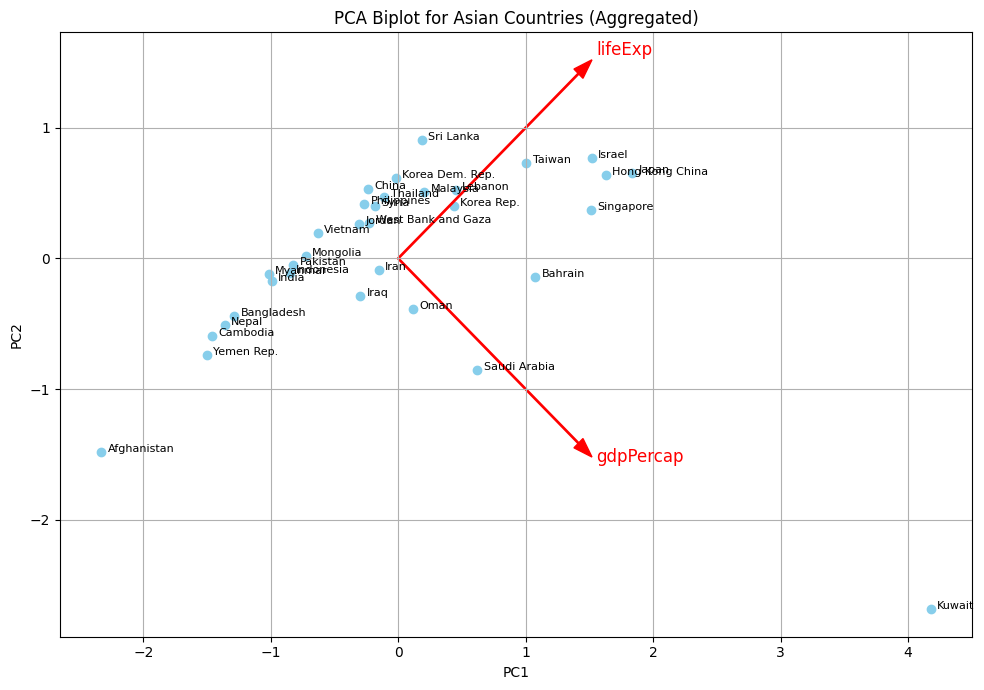

In [60]:
# Aggregate by country: mean of features for each Asian country
asia_gap_unique = gap[gap['continent'] == 'Asia'].groupby('country')[features].mean().reset_index()

# Standardize features
X_asia_unique = scaler.fit_transform(asia_gap_unique[features])

# PCA
pca_asia_unique = PCA(n_components=2)
X_asia_pca_unique = pca_asia_unique.fit_transform(X_asia_unique)
asia_gap_unique['PC1'] = X_asia_pca_unique[:, 0]
asia_gap_unique['PC2'] = X_asia_pca_unique[:, 1]

plt.figure(figsize=(10, 7))

# Plot the PCA scores with country names
plt.scatter(asia_gap_unique['PC1'], asia_gap_unique['PC2'], color='skyblue')
for i, country in enumerate(asia_gap_unique['country']):
    plt.text(asia_gap_unique['PC1'].iloc[i]+0.05, asia_gap_unique['PC2'].iloc[i], country, fontsize=8)

# Plot the feature vectors (biplot arrows)
for i, feature in enumerate(features):
    plt.arrow(0, 0,
              pca_asia_unique.components_[0, i]*2,
              pca_asia_unique.components_[1, i]*2,
              color='r', width=0.01, head_width=0.1)
    plt.text(pca_asia_unique.components_[0, i]*2.2,
             pca_asia_unique.components_[1, i]*2.2,
             feature, color='r', fontsize=12)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Biplot for Asian Countries (Aggregated)')
plt.grid(True)
plt.tight_layout()
plt.show()

## What does `PC1` correlated with? What does `PC1` mean?

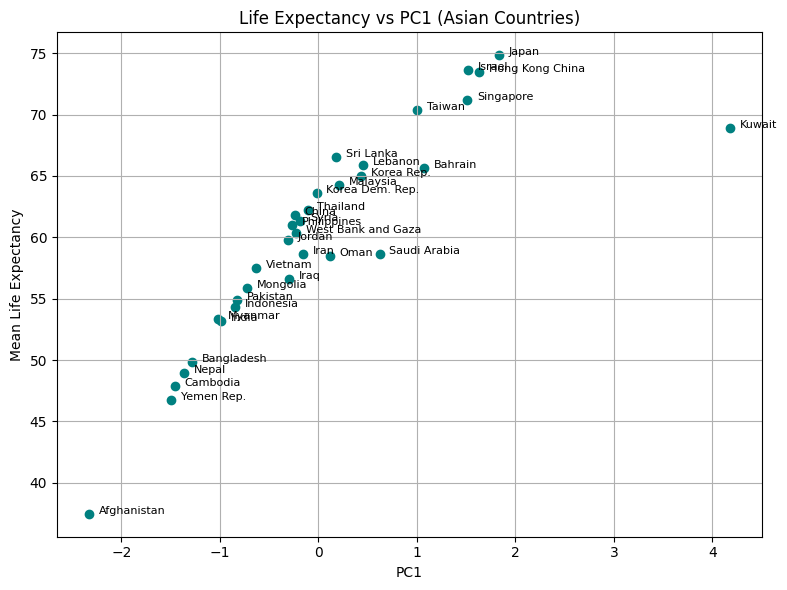

In [61]:
# If not already done, aggregate by country for Asia
asia_gap_unique = gap[gap['continent'] == 'Asia'].groupby('country')[features].mean().reset_index()

# Standardize features and perform PCA
X_asia_unique = scaler.fit_transform(asia_gap_unique[features])
pca_asia_unique = PCA(n_components=2)
X_asia_pca_unique = pca_asia_unique.fit_transform(X_asia_unique)
asia_gap_unique['PC1'] = X_asia_pca_unique[:, 0]

# Plot PC1 (x-axis) vs life expectancy (y-axis)
plt.figure(figsize=(8, 6))
plt.scatter(asia_gap_unique['PC1'], asia_gap_unique['lifeExp'], color='teal')
for i, country in enumerate(asia_gap_unique['country']):
    plt.text(asia_gap_unique['PC1'].iloc[i]+0.1, asia_gap_unique['lifeExp'].iloc[i], country, fontsize=8)
plt.xlabel('PC1')
plt.ylabel('Mean Life Expectancy')
plt.title('Life Expectancy vs PC1 (Asian Countries)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Perform tSNE on the data

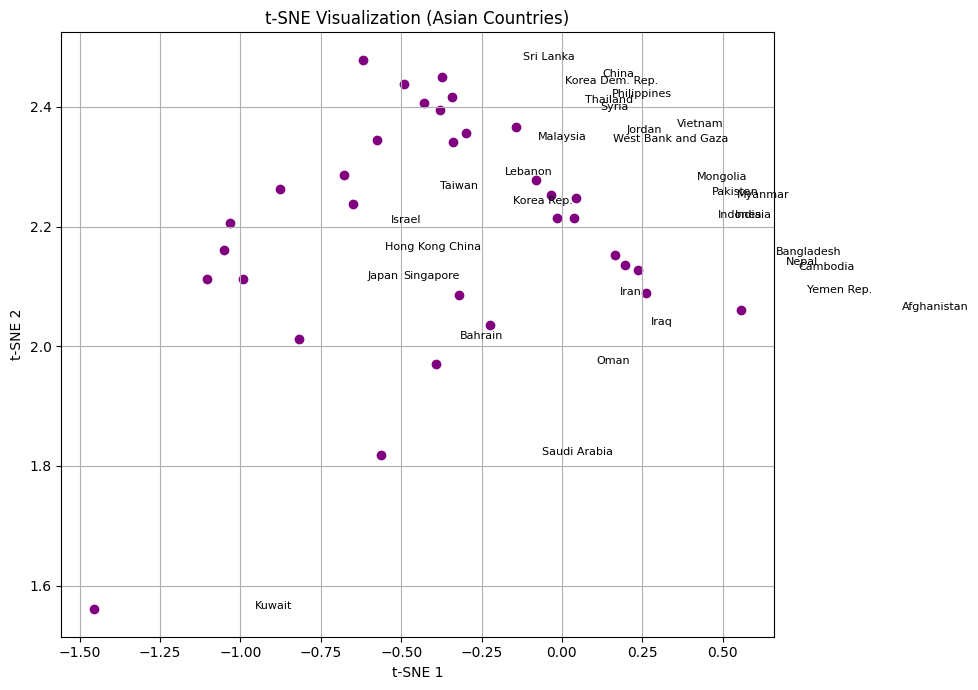

In [62]:
from sklearn.manifold import TSNE

# If not already done, aggregate and scale
asia_gap_unique = gap[gap['continent'] == 'Asia'].groupby('country')[features].mean().reset_index()
X_asia_unique = scaler.fit_transform(asia_gap_unique[features])

# Run t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_asia_tsne = tsne.fit_transform(X_asia_unique)
asia_gap_unique['TSNE1'] = X_asia_tsne[:, 0]
asia_gap_unique['TSNE2'] = X_asia_tsne[:, 1]

# Plot t-SNE with country names
plt.figure(figsize=(10, 7))
plt.scatter(asia_gap_unique['TSNE1'], asia_gap_unique['TSNE2'], color='purple')
for i, country in enumerate(asia_gap_unique['country']):
    plt.text(asia_gap_unique['TSNE1'].iloc[i]+0.5, asia_gap_unique['TSNE2'].iloc[i], country, fontsize=8)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization (Asian Countries)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Perform hierarchical clustering

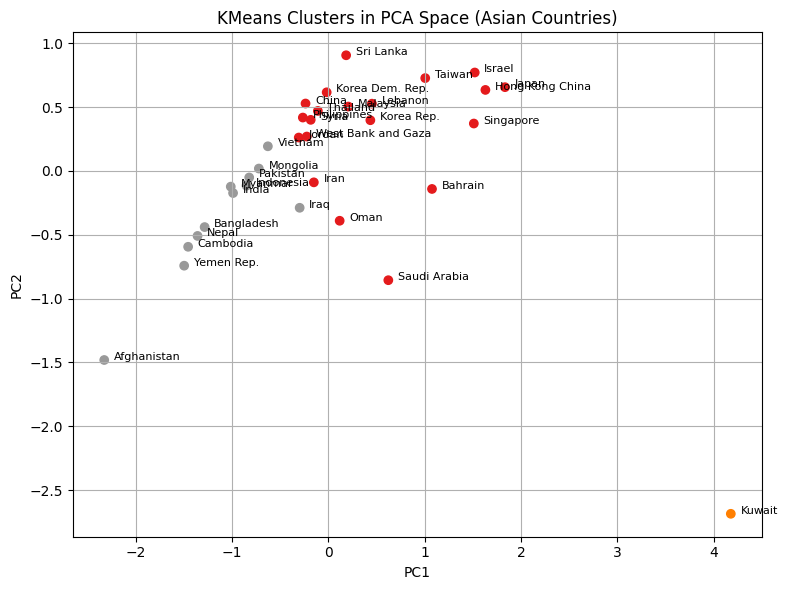

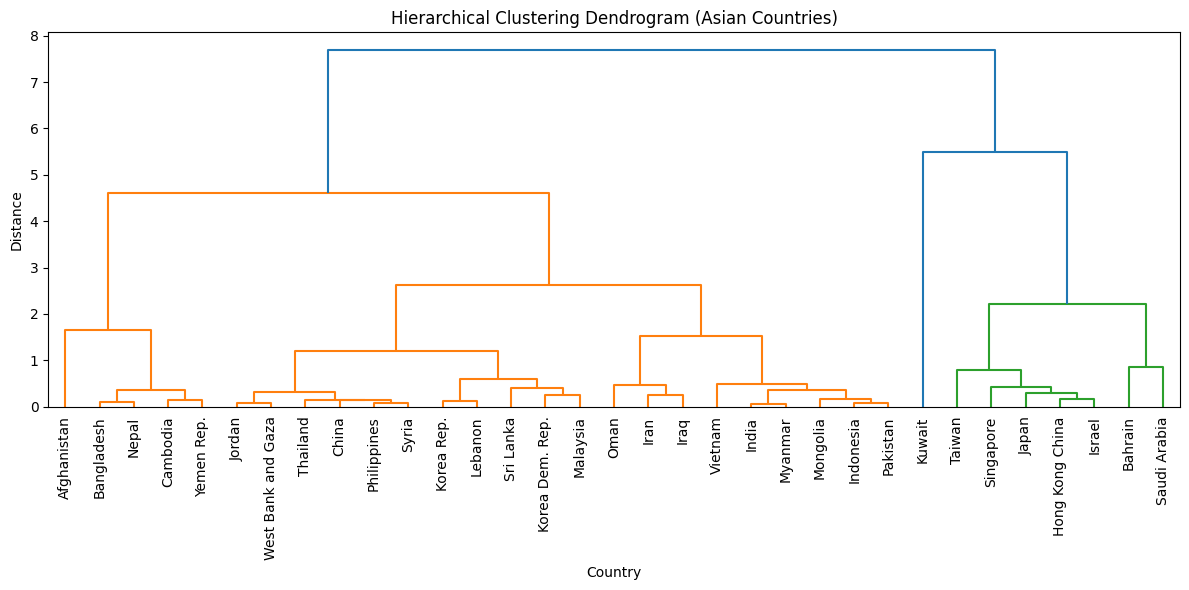

In [63]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# --- Prepare data (if not already done) ---
asia_gap_unique = gap[gap['continent'] == 'Asia'].groupby('country')[features].mean().reset_index()
X_asia_unique = scaler.fit_transform(asia_gap_unique[features])
pca_asia_unique = PCA(n_components=2)
X_asia_pca_unique = pca_asia_unique.fit_transform(X_asia_unique)
asia_gap_unique['PC1'] = X_asia_pca_unique[:, 0]
asia_gap_unique['PC2'] = X_asia_pca_unique[:, 1]

# --- KMeans clustering ---
kmeans = KMeans(n_clusters=3, random_state=42)
asia_gap_unique['kmeans_cluster'] = kmeans.fit_predict(X_asia_unique)

plt.figure(figsize=(8, 6))
plt.scatter(asia_gap_unique['PC1'], asia_gap_unique['PC2'], c=asia_gap_unique['kmeans_cluster'], cmap='Set1')
for i, country in enumerate(asia_gap_unique['country']):
    plt.text(asia_gap_unique['PC1'].iloc[i]+0.1, asia_gap_unique['PC2'].iloc[i], country, fontsize=8)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters in PCA Space (Asian Countries)')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Hierarchical clustering (dendrogram) ---
Z = linkage(X_asia_unique, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=asia_gap_unique['country'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Asian Countries)')
plt.xlabel('Country')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

## Plot heatmaps

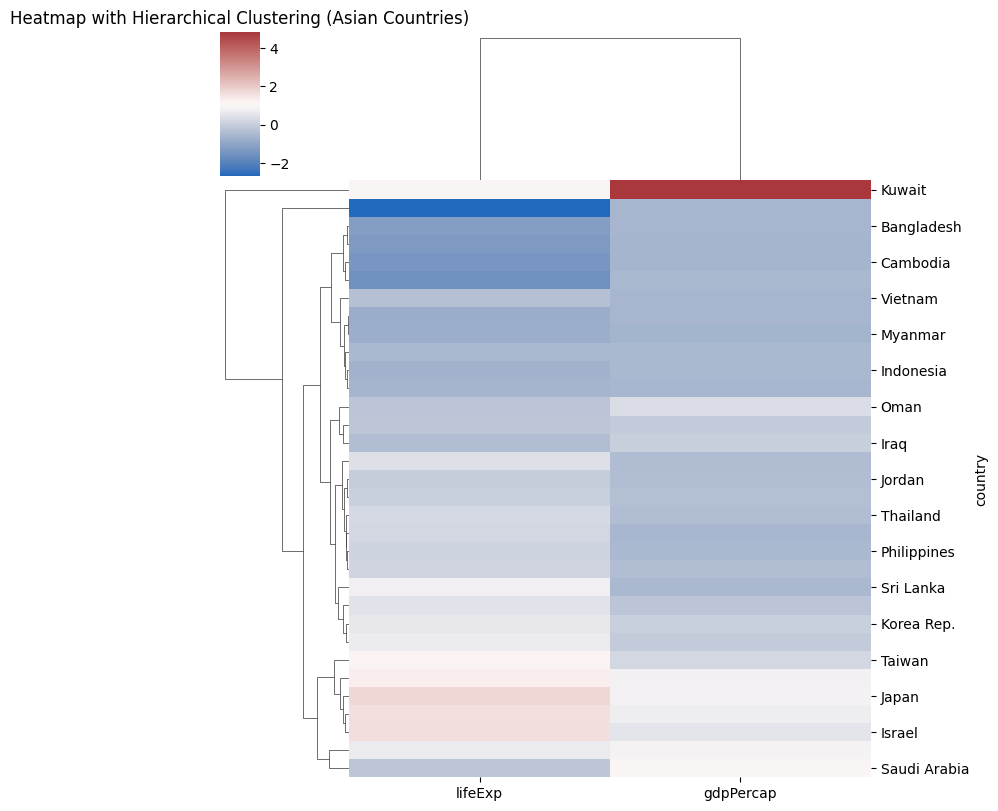

In [64]:
import seaborn as sns

# If not already done, aggregate and scale
asia_gap_unique = gap[gap['continent'] == 'Asia'].groupby('country')[features].mean().reset_index()
X_asia_unique = scaler.fit_transform(asia_gap_unique[features])

# Create a DataFrame for the heatmap
asia_heatmap_df = pd.DataFrame(X_asia_unique, index=asia_gap_unique['country'], columns=features)

# Plot heatmap with clustering
sns.clustermap(asia_heatmap_df, cmap='vlag', standard_scale=None, figsize=(8, 8))
plt.title('Heatmap with Hierarchical Clustering (Asian Countries)')
plt.show()

## References

- **Gapminder Foundation**  
  Gapminder’s official data repository and documentation:  
  https://www.gapminder.org/data/  


- **Wikipedia: Gapminder**  
  Overview of the project, dataset history, and methodology:  
  https://en.wikipedia.org/wiki/Gapminder  

- **Pedersen, S.**, & **Roser, M.** (2010). *Gapminder: Unveiling the Beauty of Statistics for a Fact‐Based World View*.  
  A description of the philosophy and construction of the Gapminder dataset.  

- https://github.com/swcarpentry/r-novice-gapminder  